# Preparation, cleaning and export the dataset to use for the app

### Import and instalation

In [35]:
%pip install pandas matplotlib seaborn missingno scikit-learn jupyterlab
%pip install openpyxl

532.75s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


539.16s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report
import joblib

### Loading and exploring the dataset

In [37]:
data = pd.read_csv('water_potability.csv')

In [38]:
data.columns
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


### Data preproccessing

In [39]:
data['Potability'].value_counts()

Potability
0    1998
1    1278
Name: count, dtype: int64

<Axes: xlabel='Potability', ylabel='count'>

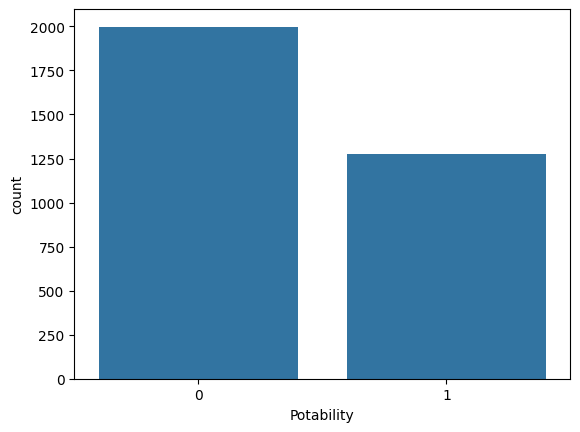

In [40]:
sns.countplot(x='Potability', data=data)

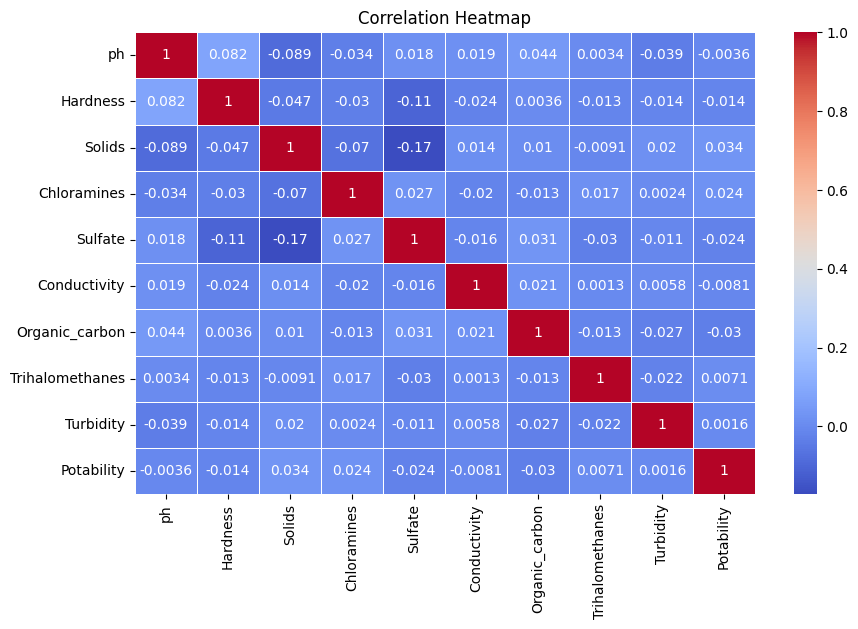

In [41]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### Missing values

In [42]:
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

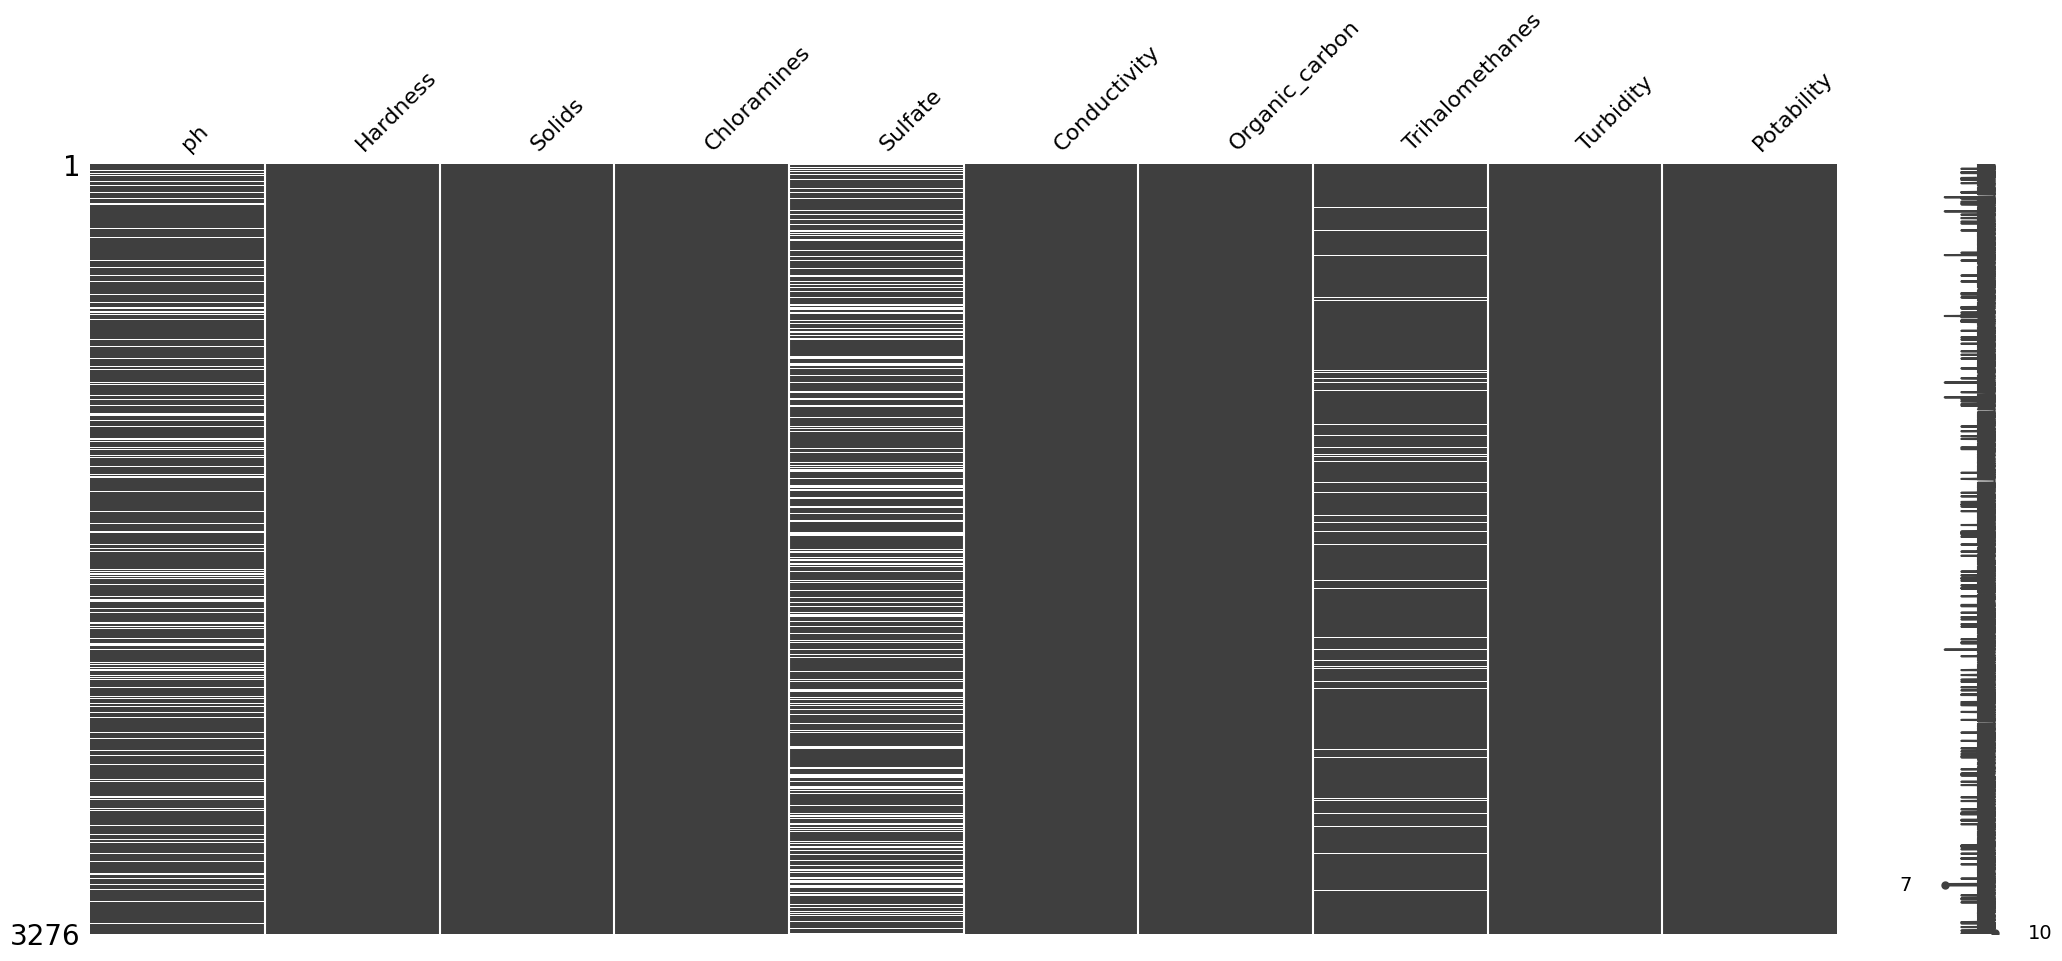

In [43]:
msno.matrix(data)
plt.show()

In [44]:
columns_to_fill = ['ph', 'Sulfate', 'Trihalomethanes']
for column in columns_to_fill:

    data[column] = data.groupby('Potability')[column].transform(lambda x: x.fillna(x.mean()))

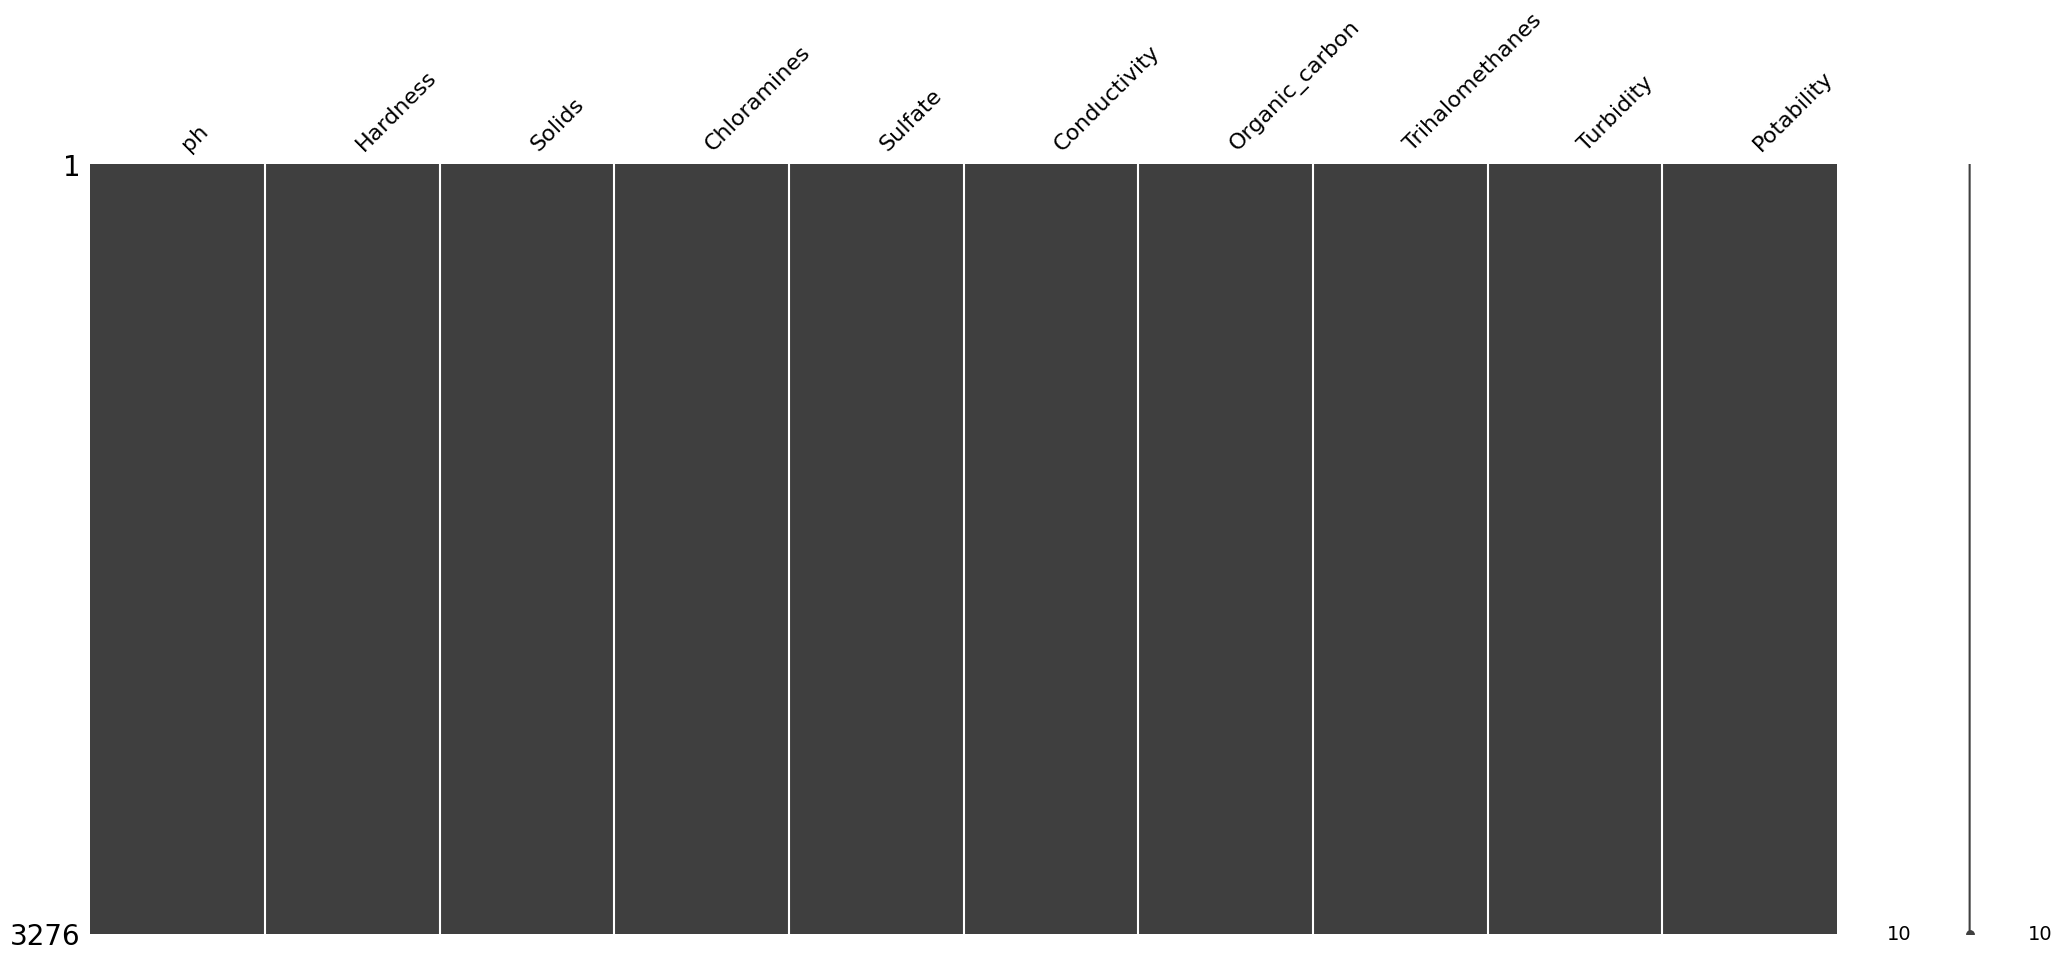

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [45]:
msno.matrix(data)
plt.show()
data.isnull().sum()

### Data preparation


In [46]:
x=data.drop('Potability', axis=1)
y=data['Potability']

x.shape, y.shape

((3276, 9), (3276,))

In [47]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [49]:
y_test

2947    0
2782    1
1644    0
70      0
2045    1
       ..
208     0
1578    1
565     0
313     1
601     0
Name: Potability, Length: 656, dtype: int64

In [50]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2620, 9), (656, 9), (2620,), (656,))

In [51]:
#decision trees

#1.instance the model
decision_tree_model = DecisionTreeClassifier()

#2.fit the data into the model
decision_tree_model.fit(X_train, y_train)

#Make the predictions
decision_tree_predictions = decision_tree_model.predict(X_test)

#4.evaluate the model (actual x predicted)
decision_tree_accuracy = accuracy_score(y_test, decision_tree_predictions)
decision_tree_accuracy

0.7439024390243902

In [52]:
#random forest

#1.instance the model
random_forest_model = RandomForestClassifier(random_state=123)

#2.fit the data into the model
random_forest_model.fit(X_train, y_train)

#Make the predictions
random_forest_predictions = random_forest_model.predict(X_test)

#4.evaluate the model (actual x predicted)
random_forest_accuracy = accuracy_score(y_test, random_forest_predictions)
random_forest_accuracy *100

81.09756097560977

In [53]:
#SVM
#1.instance the model
svm_model = SVC(random_state=123)

#2.fit the data into the model
svm_model.fit(X_train, y_train)

#Make the predictions
svm_predictions = svm_model.predict(X_test)

#4.evaluate the model (actual x predicted)
svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_accuracy*100

69.96951219512195

In [54]:
#LogisticRegression
#1.instance the model
lr_model = LogisticRegression(random_state=123)

#2.fit the data into the model
lr_model.fit(X_train, y_train)

#Make the predictions
lr_predictions = lr_model.predict(X_test)

#4.evaluate the model (actual x predicted)
lr_accuracy = accuracy_score(y_test, lr_predictions)
lr_accuracy*100

62.80487804878049

In [55]:
models_accuracies = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest', 'SVM', 'Logistic Regression'],
    'Accuracy': [decision_tree_accuracy, random_forest_accuracy, svm_accuracy, lr_accuracy]
})

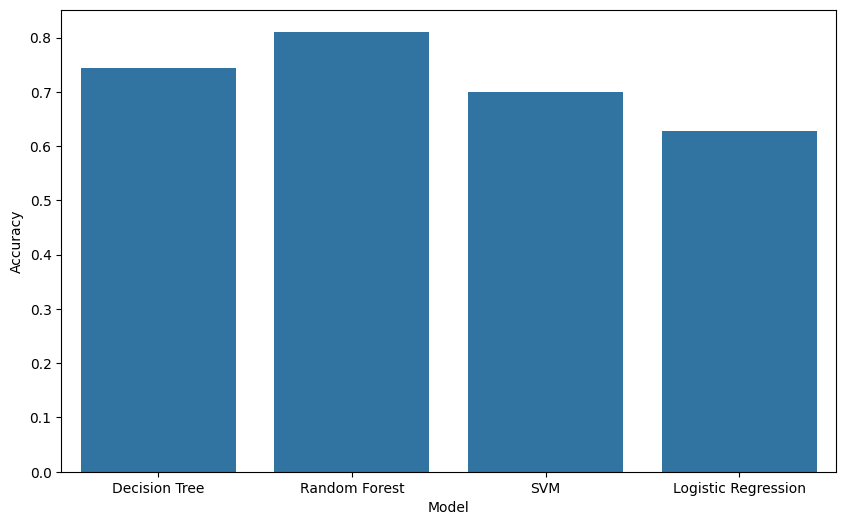

In [56]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=models_accuracies)
plt.show()


In [57]:
%pip install shap
import shap

549.67s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [58]:
explainer = shap.TreeExplainer(random_forest_model)
shap_values = explainer.shap_values(X_test)

In [59]:
shap_values.shape

(656, 9, 2)

In [60]:
shap_values_potable = shap_values[:,:,1]

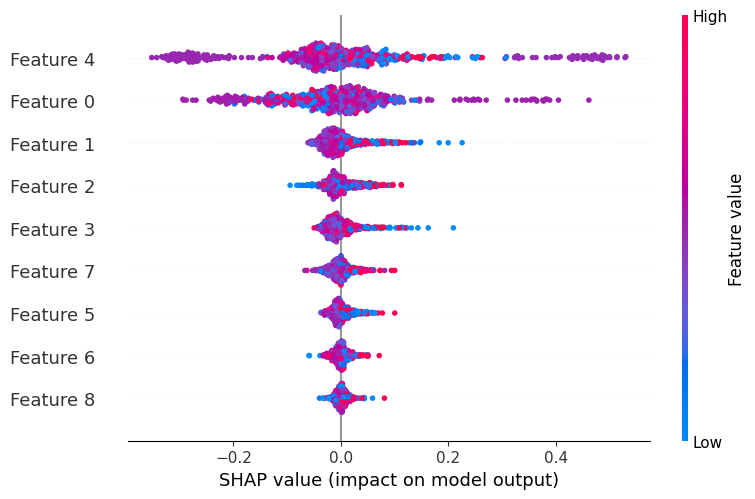

In [61]:
shap.summary_plot(shap_values_potable, X_test)

In [62]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ph,3276.0,7.080855,1.469958,0.000000,6.277673,7.085378,7.870050,14.000000
Hardness,3276.0,196.369496,32.879761,47.432000,176.850538,196.967627,216.667456,323.124000
Solids,3276.0,22014.092526,8768.570828,320.942611,15666.690297,20927.833607,27332.762127,61227.196008
Chloramines,3276.0,7.122277,1.583085,0.352000,6.127421,7.130299,8.114887,13.127000
Sulfate,3276.0,333.785123,36.145701,129.000000,317.094638,334.564290,350.385756,481.030642
Conductivity,3276.0,426.205111,80.824064,181.483754,365.734414,421.884968,481.792304,753.342620
Organic_carbon,3276.0,14.284970,3.308162,2.200000,12.065801,14.218338,16.557652,28.300000
Trihalomethanes,3276.0,66.395671,15.769901,0.738000,56.647656,66.303555,76.666609,124.000000
Turbidity,3276.0,3.966786,0.780382,1.450000,3.439711,3.955028,4.500320,6.739000
Potability,3276.0,0.390110,0.487849,0.000000,0.000000,0.000000,1.000000,1.000000


## Model cross-validation and advanced evaluation
Comparationg models using cross-validation

In [63]:

models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(random_state=123),
    'SVM': SVC(random_state=123),
    'Logistic Regression': LogisticRegression(random_state=123)
}

print("Cross-validation (5-fold) for each model")
for name, model in models.items():
    scores = cross_val_score(model, X_scaled, y, cv=5)
    print(f"{name}: {scores.mean():.2f} (+/- {scores.std():.2f})")

# Ejemplo de pipeline con Random Forest
pipe_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', RandomForestClassifier(random_state=123))
])
scores = cross_val_score(pipe_rf, x, y, cv=5)
print("Random Forest with pipeline (CV 5-fold):", scores.mean())

Cross-validation (5-fold) for each model
Decision Tree: 0.71 (+/- 0.02)
Random Forest: 0.77 (+/- 0.02)
Random Forest: 0.77 (+/- 0.02)
SVM: 0.65 (+/- 0.03)
Logistic Regression: 0.61 (+/- 0.00)
SVM: 0.65 (+/- 0.03)
Logistic Regression: 0.61 (+/- 0.00)
Random Forest with pipeline (CV 5-fold): 0.7698482591696145
Random Forest with pipeline (CV 5-fold): 0.7698482591696145


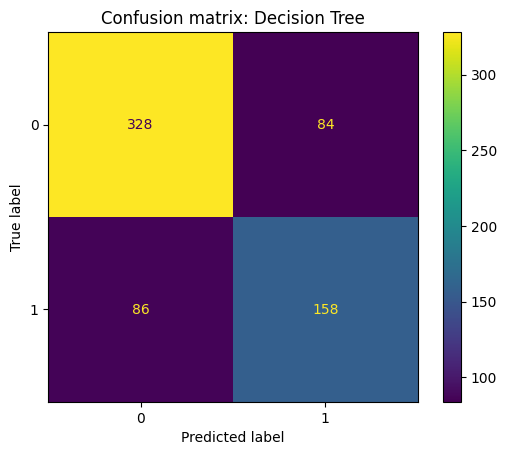

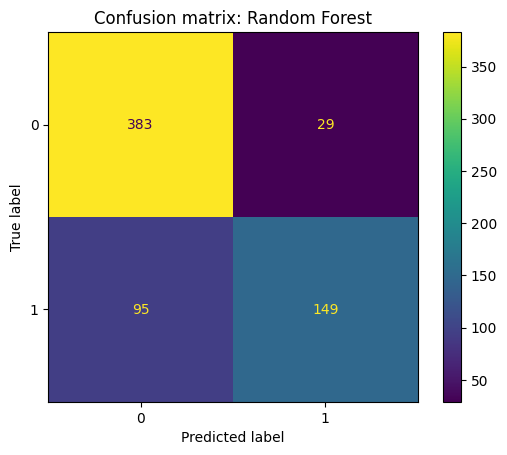

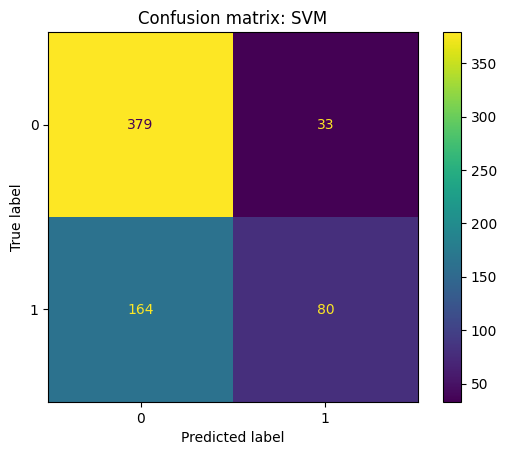

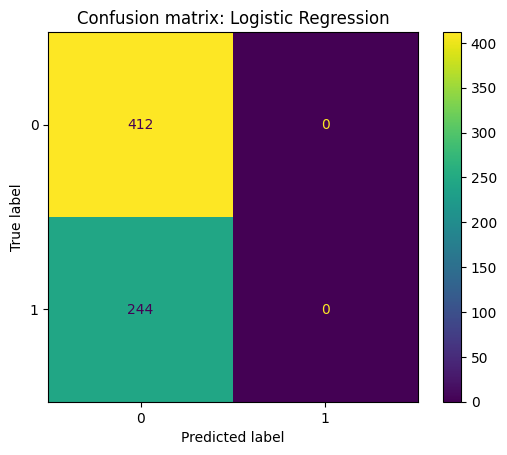

In [64]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(f"Confusion matrix: {name}")
    plt.show()

### Hyperparameter optimization for Random Forest


In [65]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

rf = RandomForestClassifier(random_state=123)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Better parameters:", grid_search.best_params_)
print("Improved accuracy in cross-validation:", grid_search.best_score_)

# Evaluación en el conjunto de test
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy in the test set with optimized Random Forest:", accuracy)

/home/alanb/jupyter/ML_WaterQuality_App/.venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:516: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
396 fits failed with the following error:
Traceback (most recent call last):
  File "/home/alanb/jupyter/ML_WaterQuality_App/.venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/alanb/jupyter/ML_WaterQuality_App/.venv/lib/python3.10/site-packages/sklearn/base.py", line 1356, in wrapper
    estimator._validate_params()
  File "/home/alanb/jupyter/ML_WaterQuality_App/.venv/lib/python3.10/site-packages/skl

Better parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
Improved accuracy in cross-validation: 0.799618320610687
Accuracy in the test set with optimized Random Forest: 0.8033536585365854


In [66]:
import joblib

# Save the best model
joblib.dump(best_rf, 'best_random_forest.pkl')
print("Mode saved as 'best_random_forest.pkl'")

Mode saved as 'best_random_forest.pkl'


In [67]:
# Load the saved model
modelo = joblib.load('best_random_forest.pkl')
# Print the precision of the loaded model
y_pred = modelo.predict(X_test)
precision = accuracy_score(y_test, y_pred)
print(f"Accuracy of the loaded model: {precision:.3f}")

Accuracy of the loaded model: 0.803


Accuracy: 0.803
Precision: 0.862
Recall: 0.561
F1-score: 0.680
ROC-AUC: 0.880

Classification report:
               precision    recall  f1-score   support

           0       0.78      0.95      0.86       412
           1       0.86      0.56      0.68       244

    accuracy                           0.80       656
   macro avg       0.82      0.75      0.77       656
weighted avg       0.81      0.80      0.79       656



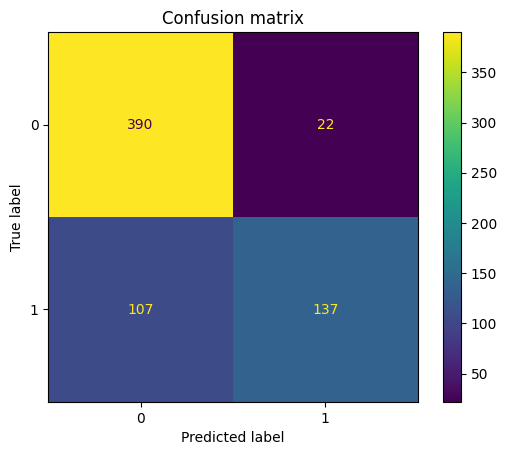

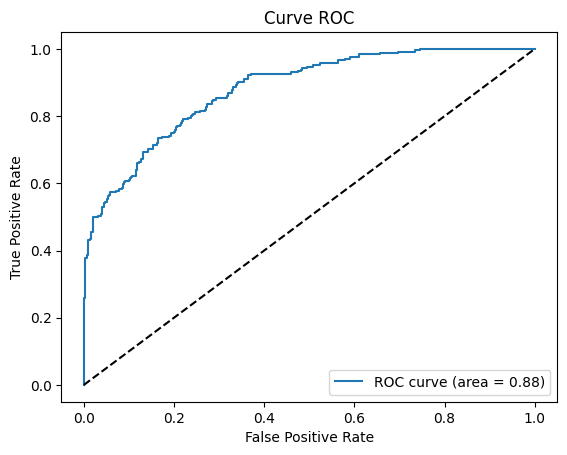

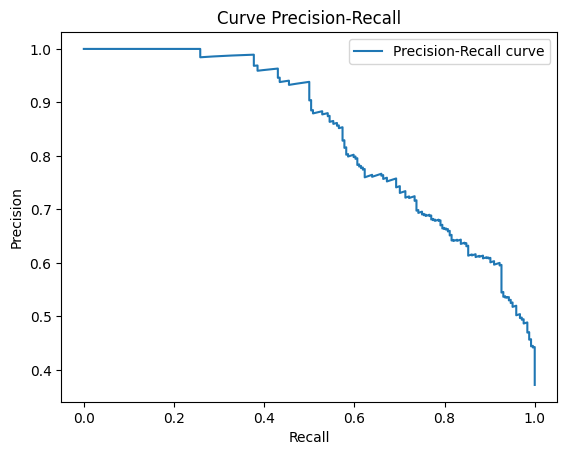

In [68]:
# Metrics of the model
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix,
    classification_report, roc_curve, precision_recall_curve, ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt
import numpy as np

# Predictions
y_pred = modelo.predict(X_test)

# Probabilities of ROC and PRC
if hasattr(modelo, "predict_proba"):
    y_proba = modelo.predict_proba(X_test)[:, 1]
else:
    y_proba = None

# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.3f}")

# Precision, Recall, F1
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Precision: {prec:.3f}")
print(f"Recall: {rec:.3f}")
print(f"F1-score: {f1:.3f}")

# ROC-AUC
if y_proba is not None:
    roc_auc = roc_auc_score(y_test, y_proba)
    print(f"ROC-AUC: {roc_auc:.3f}")
else:
    print("ROC-AUC: No disponible para este modelo.")

# Classification report
print("\nClassification report:\n", classification_report(y_test, y_pred))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion matrix")
plt.show()

# Curva ROC
if y_proba is not None:
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.figure()
    plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Curve ROC')
    plt.legend(loc='lower right')
    plt.show()

# Curva Precision-Recall
if y_proba is not None:
    precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_proba)
    plt.figure()
    plt.plot(recall_vals, precision_vals, label='Precision-Recall curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Curve Precision-Recall')
    plt.legend()
    plt.show()
